In [1]:
%load_ext autoreload

In [2]:
import times_series_learning as tsl
import server_profile_learning as spl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import datetime as dt
import time
from logreader import read_dir
from logparser import parse_all
from loganalyzer import MessageLogAnalyzer, describe, print_description, print_clusters
import class_time_series
import pandas as pd
import numpy as np
import sortedcontainers
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%autoreload 



In [3]:
pwd

'/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/LogKiller'

In [4]:
LogPath = '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics'
p = class_time_series.GetServerData(LogPath)
ServerName = p.ServerList()

In [5]:
#Server present the 19/10/2017
ServerPresent1910 =ServerName.columns[ServerName.loc['2017-10-19'] !=0]
ServerPresent1910

Index(['10.60.64.53', 'airfrance.fr', 'centos.localdomain', 'g',
       'qviqbocpmg04', 'qvirbkarno10', 'qvirnascgo02', 'qvirnmonlx02',
       'qvisbcld0084', 'qvisbcld0146.novalocal', 'qvisbcldaa20',
       'qvisbcldaa22', 'qvisbcldaa35', 'qvisbcldaa36', 'qvisbcldaa38',
       'qvisbcldaa46', 'qvisbcldaa60', 'qvisbcldaa62', 'qvisbcldaa64',
       'qvisbcldaa66', 'qvisbcldaa68', 'qvisbcldaa70', 'qvisbcldaa72',
       'qvisbcldaa74', 'qvisbcldaa76', 'qvisbcldaa78', 'qvisbcloud12',
       'qvisbcloud22', 'qvisbcloud24', 'qvisbcloud28', 'qvisbcloud30',
       'qvisbcloud46', 'qvisbcloud48', 'qvisbcloud54', 'qvisbcloud58',
       'qvisbcloud64', 'qvisbcloud72', 'qvisbcloud88', 'qvisbcloud92',
       'qvisbcloud98', 'redhat.localdomain', 'tlssbcld0055',
       'tlssbcld0055.novalocal'],
      dtype='object')

In [6]:
ServerName.loc[:,ServerPresent1910]

,10.60.64.53,airfrance.fr,centos.localdomain,g,qviqbocpmg04,qvirbkarno10,qvirnascgo02,qvirnmonlx02,qvisbcld0084,qvisbcld0146.novalocal,...,qvisbcloud54,qvisbcloud58,qvisbcloud64,qvisbcloud72,qvisbcloud88,qvisbcloud92,qvisbcloud98,redhat.localdomain,tlssbcld0055,tlssbcld0055.novalocal
2017-04-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Select a full week for learning even if not contiguous date
date_available = ServerName[ServerName['qvirbkarno10'] != 0].index
# let 's del the 2017-10-19
date_available = np.delete(date_available, np.argwhere(date_available == '2017-10-19')[0])
# bug from 19:00 for 284 minutes without logs
print(type(date_available))
# let's take now the first full week
date_ind = np.empty(7,dtype=dt.date)
date_available_2 = np.empty(date_available.shape[0]-7,dtype=dt.date)
for i in range(7):
    d = date_available[int(np.argwhere(date_available.weekday ==i)[0])]
    date_available = np.delete(date_available, np.argwhere(date_available == d)[0])
    date_ind[i]= dt.date.fromtimestamp(d.timestamp())
date_available_2 =[dt.date.fromtimestamp(d.timestamp()) for d in date_available]
print(date_available_2)
print(date_ind)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
[datetime.date(2017, 10, 8), datetime.date(2017, 10, 10), datetime.date(2017, 10, 11), datetime.date(2017, 10, 16), datetime.date(2017, 10, 18), datetime.date(2017, 10, 20), datetime.date(2017, 10, 21), datetime.date(2017, 10, 24)]
[datetime.date(2017, 10, 2) datetime.date(2017, 10, 3)
 datetime.date(2017, 10, 4) datetime.date(2017, 10, 26)
 datetime.date(2017, 10, 6) datetime.date(2017, 9, 30)
 datetime.date(2017, 10, 1)]


In [8]:
#best choice qvirbkarno
log_data_list = ServerName.loc[:,'qvirbkarno10'].values
log_data_list = [i for i in log_data_list if i !=0 ]
log_data_list

['/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20170930.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171001.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171002.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171003.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171004.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171006.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171008.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171010.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/logs/analytics/qvirbkarno10.20171011.log',
 '/home/joseph/Dropbox/DeepLearning/ProjetFilRouge/AirFrance/log

In [9]:
#Log Clustering

analyzer = MessageLogAnalyzer()

# Import des logs
logs = read_dir('../logs/analytics/*qvirbkarno10*')

# Parsing des logs en df
df_log = parse_all(logs)

# Extraction de la partie message
X = df_log.loc[:,2:].values

# Count des fréquences verticales
X_count = analyzer.fit_count(X) # "batch"

# Obtention des labels de clustering
y = analyzer.fit_clusterize(X,X_count)

# Stockage des labels de clustering
df_log['label'] = y

df_log.to_csv('dataframe.csv')

../logs/analytics/qvirbkarno10.20171024.log
../logs/analytics/qvirbkarno10.20171004.log
../logs/analytics/qvirbkarno10.20171006.log
../logs/analytics/qvirbkarno10.20171021.log
../logs/analytics/qvirbkarno10.20171019.log
../logs/analytics/qvirbkarno10.20171008.log
../logs/analytics/qvirbkarno10.20171002.log
../logs/analytics/qvirbkarno10.20171020.log
../logs/analytics/qvirbkarno10.20170930.log
../logs/analytics/qvirbkarno10.20171026.log
../logs/analytics/qvirbkarno10.20171016.log
../logs/analytics/qvirbkarno10.20171011.log
../logs/analytics/qvirbkarno10.20171001.log
../logs/analytics/qvirbkarno10.20171003.log
../logs/analytics/qvirbkarno10.20171018.log
../logs/analytics/qvirbkarno10.20171010.log

[Sucess] 16 files loaded
[Success] Logs parsed within 0.63s
[Success] Vocabulary processed within 0.79s
[Success] 143049 Logs reduced into 70 Clusters within 9.68s


In [10]:
df_log = pd.read_csv('dataframe.csv')

In [11]:
df_log.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,label
0,2017-10-24 00:00:11,qvirbkarno10,sshd[18258]:,Did,not,receive,identification,string,from,387.687.387.951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2017-10-24 00:00:51,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,18697,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2017-10-24 00:00:51,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,18697,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2017-10-24 00:01:01,qvirbkarno10,CROND[19477]:,(root),CMD,(run-parts /etc/cron.hourly),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,2017-10-24 00:01:01,qvirbkarno10,run-parts(/etc/cron.hourly)[19477]:,starting,0anacron,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [12]:
date_ind

array([datetime.date(2017, 10, 2), datetime.date(2017, 10, 3),
       datetime.date(2017, 10, 4), datetime.date(2017, 10, 26),
       datetime.date(2017, 10, 6), datetime.date(2017, 9, 30),
       datetime.date(2017, 10, 1)], dtype=object)

In [13]:
# I have to preprocess the dataframe, put timestamp in index in order to get
# the 3 datasets (1 for profiling, 2nd to set distributionn, 3rd to test)
df_log.index = pd.to_datetime(df_log.timestamp, format='%Y-%m-%d %H:%M:%S')
df_log = df_log.sort_index()

In [14]:
df_log.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-09-30 00:00:01,2017-09-30 00:00:01,qvirbkarno10,CROND[17421]:,(root),CMD,(/usr/lib64/sa/sa1 1 1),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2017-09-30 00:00:18,2017-09-30 00:00:18,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,17444,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-09-30 00:00:18,2017-09-30 00:00:18,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,17444,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-09-30 00:00:43,2017-09-30 00:00:43,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,17839,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2017-09-30 00:00:43,2017-09-30 00:00:43,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,17839,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [18]:
date_train = [t.isoformat() for t in date_available_2]
date_profile = [t.isoformat() for t in date_ind]
date_profile

['2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-26',
 '2017-10-06',
 '2017-09-30',
 '2017-10-01']

In [19]:
#resample nous demande une semaine contigu
data_train = pd.DataFrame()
data_profile = pd.DataFrame() 

for d in date_profile:
    data_profile = pd.concat([data_profile,df_log.loc[d,:]], axis=0)

data_test = df_log.loc['2017-10-19',:].reset_index(drop=True)
data_profile.sort_index(inplace=True)
data_profile = data_profile.reset_index(drop=True)
data_train = data_train.reset_index(drop=True)

In [20]:
date_profile

['2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-26',
 '2017-10-06',
 '2017-09-30',
 '2017-10-01']

In [21]:
data_profile.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,label
0,2017-09-30 00:00:01,qvirbkarno10,CROND[17421]:,(root),CMD,(/usr/lib64/sa/sa1 1 1),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,2017-09-30 00:00:18,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,17444,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2017-09-30 00:00:18,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,17444,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2017-09-30 00:00:43,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,17839,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2017-09-30 00:00:43,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,17839,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
distribution_init = sortedcontainers.SortedDict(sortedcontainers.SortedList())
for i in range(7):
    distribution_init[i]=sortedcontainers.SortedList([0,np.inf])

In [30]:
# Server Profile Learning (data, parameters, distribution, distribution_period, level_threshold)
%autoreload 
period = 1
m_avg_period = 5
dist_period = 15
dist_radius = 5
parameters = np.asarray([period, m_avg_period, dist_period, dist_radius])
distribution_period = 60*24 # 1 distribution for each day
level_threshold = 1e-2 # For defining outliers
distribution = distribution_init
processus = True

In [31]:
server_profile = spl.ServerProfileLearning(data_profile,parameters, distribution,distribution_period,level_threshold, processus)
server_profile.set_profile()

cluster number 0 of hostname: qvirbkarno10
cluster number 1 of hostname: qvirbkarno10
cluster number 2 of hostname: qvirbkarno10
cluster number 4 of hostname: qvirbkarno10
cluster number 5 of hostname: qvirbkarno10
cluster number 6 of hostname: qvirbkarno10
cluster number 7 of hostname: qvirbkarno10
cluster number 8 of hostname: qvirbkarno10
cluster number 9 of hostname: qvirbkarno10
cluster number 10 of hostname: qvirbkarno10
cluster number 11 of hostname: qvirbkarno10
cluster number 12 of hostname: qvirbkarno10
cluster number 13 of hostname: qvirbkarno10
cluster number 14 of hostname: qvirbkarno10
cluster number 15 of hostname: qvirbkarno10
cluster number 16 of hostname: qvirbkarno10
cluster number 17 of hostname: qvirbkarno10
cluster number 18 of hostname: qvirbkarno10
cluster number 19 of hostname: qvirbkarno10
cluster number 20 of hostname: qvirbkarno10
cluster number 21 of hostname: qvirbkarno10
cluster number 22 of hostname: qvirbkarno10
cluster number 23 of hostname: qvirbkarno

In [32]:
server_profile.server_profile.keys()

dict_keys(['qvirbkarno10_general', 'qvirbkarno10_0', 'qvirbkarno10_1', 'qvirbkarno10_2', 'qvirbkarno10_4', 'qvirbkarno10_5', 'qvirbkarno10_6', 'qvirbkarno10_7', 'qvirbkarno10_8', 'qvirbkarno10_9', 'qvirbkarno10_10', 'qvirbkarno10_11', 'qvirbkarno10_12', 'qvirbkarno10_13', 'qvirbkarno10_14', 'qvirbkarno10_15', 'qvirbkarno10_16', 'qvirbkarno10_17', 'qvirbkarno10_18', 'qvirbkarno10_19', 'qvirbkarno10_20', 'qvirbkarno10_21', 'qvirbkarno10_22', 'qvirbkarno10_23', 'qvirbkarno10_24', 'qvirbkarno10_26', 'qvirbkarno10_27', 'qvirbkarno10_32', 'qvirbkarno10_33', 'qvirbkarno10_36', 'qvirbkarno10_37', 'qvirbkarno10_38', 'qvirbkarno10_39', 'qvirbkarno10_42', 'qvirbkarno10_44', 'qvirbkarno10_46', 'qvirbkarno10_47', 'qvirbkarno10_48', 'qvirbkarno10_49', 'qvirbkarno10_50', 'qvirbkarno10_51', 'qvirbkarno10_52', 'qvirbkarno10_62', 'qvirbkarno10_64', 'qvirbkarno10_65', 'qvirbkarno10_66', 'qvirbkarno10_68'])

In [33]:
len(server_profile.server_profile.keys())

47

In [34]:
server_profile.server_profile['qvirbkarno10_general'].max_spread

201

In [36]:
server_profile.server_profile['qvirbkarno10_general'].profile.head(30)

,intensity
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


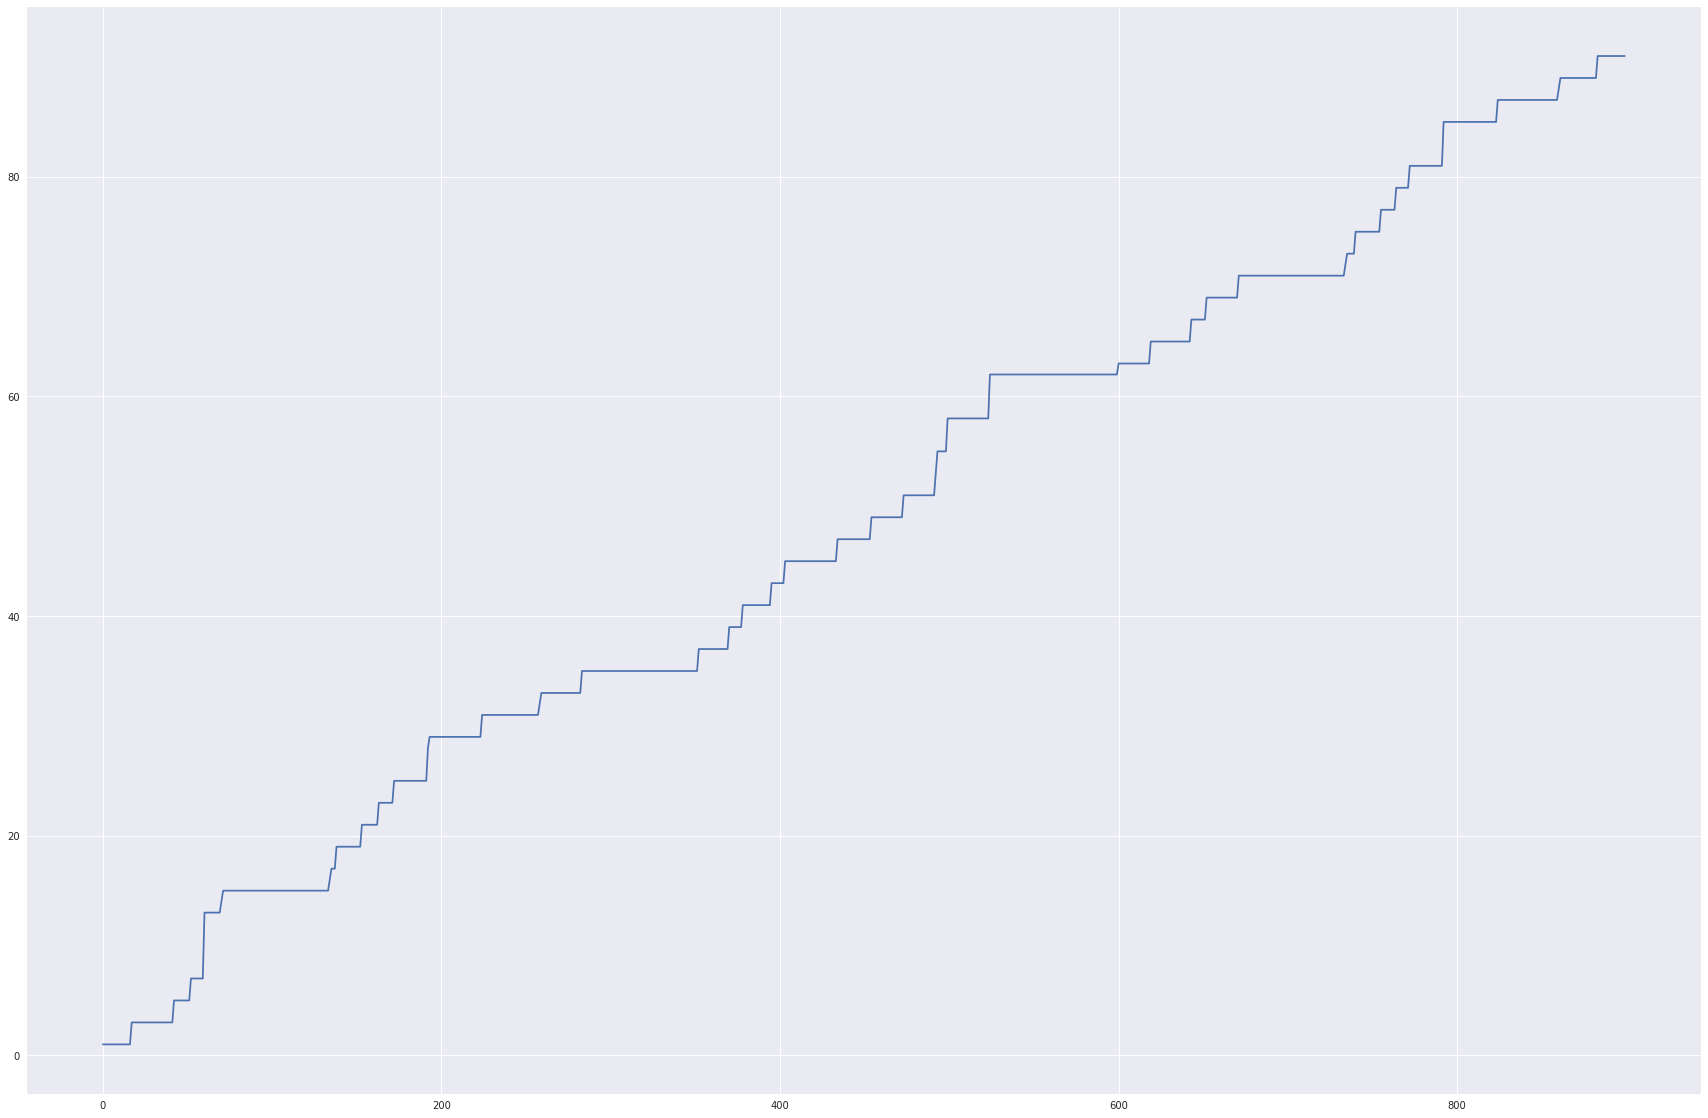

In [42]:
plt.figure(figsize=(30,20))
plt.plot(server_profile.server_profile['qvirbkarno10_general'].profile[:15*60])

In [45]:
server_profile.server_profile['qvirbkarno10_general'].profile.index.shape

(2315871,)

3.8291517857142856

In [68]:
# Streaming simulation
# data to init distribution
server_profile.level_threshold = 0
# date are not contiguous
streaming_data_list=[]
for i in date_train:
    streaming_data_list.extend(server_profile.simulate_streaming(df_log.loc[i,:]))

In [69]:
len(streaming_data_list)

764

In [70]:
server_profile.distribution =distribution_init

In [71]:
len(streaming_data_list)

764

In [72]:
streaming_data_list[0]

,timestamp,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,label
0,2017-10-08 00:00:32,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,20259,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2017-10-08 00:00:32,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,20259,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2017-10-08 00:00:32,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,20251,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2017-10-08 00:00:32,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,20251,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2017-10-08 00:00:49,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,20268,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2017-10-08 00:00:49,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,20268,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,2017-10-08 00:00:57,qvirbkarno10,xinetd[20976]:,EXIT:,nrpe,status,0,pid,20283,duration,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,2017-10-08 00:00:57,qvirbkarno10,xinetd[20976]:,START:,nrpe,pid,20283,from,387.547.159.271,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,2017-10-08 00:01:01,qvirbkarno10,anacron[20353]:,Anacron,started,on,2017-10-08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
9,2017-10-08 00:01:01,qvirbkarno10,run-parts(/etc/cron.hourly)[20343]:,starting,0anacron,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [73]:
# learning the distribution hope we do not have any
%autoreload 
distribution_init = sortedcontainers.SortedDict(sortedcontainers.SortedList())
for i in range(7):
    distribution_init[i]=sortedcontainers.SortedList([0,np.inf])
server_profile.verbose = False
server_profile.level_threshold = 1e-6
server_profile.distribution = distribution_init
server_profile.processus = True
for k,v in enumerate(streaming_data_list):
    anomaly, max_spread, min_spread, d, date, threshold, quant = server_profile.process_distance(v)
    print('stream index '+str(k)+' is processed')

KeyError: 6

/home/joseph/anaconda3/lib/python3.6/site-packages/seaborn/utils.py:350: RuntimeWarning: invalid value encountered in double_scalars
  return q3 - q1


ValueError: cannot convert float NaN to integer

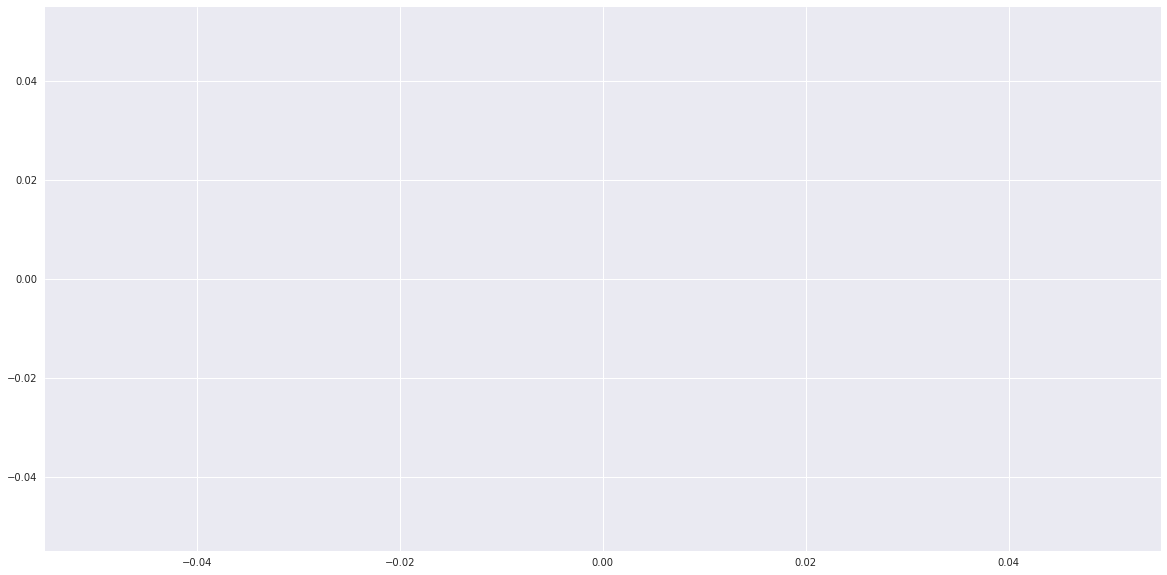

In [73]:

for k in server_profile.distribution.keys():
    #server_profile.distribution[k].remove(np.inf)
    if k!=3:
        plt.figure(figsize=(20,10))
        sns.distplot(server_profile.distribution[k],label='distribution for day'+str(k))
        plt.legend()
        plt.title('distance distribution')
        plt.grid(True)
        plt.show()


In [132]:
server_profile.verbose = True 

streaming_data_test = server_profile.simulate_streaming(data_test)
for k,v in enumerate(streaming_data_test):
    anomaly, max_spread, min_spread, d, date, threshold, quant = server_profile.process_distance(v)
    print('stream index '+str(k)+' is processed')

Alert Anomaly detected, the distance is in the 0.01
Anomaly detected 

log spread anomaly False
profile_distance anomaly True
distance detected is: 29.002313110899543
Alert Anomaly detected, the distance is in the 0.01
Anomaly detected 

log spread anomaly False
profile_distance anomaly True
distance detected is: 23.581969114653294
Alert Anomaly detected, the distance is in the 0.01
Anomaly detected 

log spread anomaly False
profile_distance anomaly True
distance detected is: 1.936054490480512
Alert Anomaly detected, the distance is in the 0.01
Anomaly detected 

log spread anomaly False
profile_distance anomaly True
distance detected is: 4.054258301220258
Alert Anomaly detected, the distance is in the 0.01
Anomaly detected 

log spread anomaly False
profile_distance anomaly True
distance detected is: 2.0271387199474153
Alert Anomaly detected, the distance is in the 0.01
Anomaly detected 

log spread anomaly False
profile_distance anomaly True
distance detected is: 2.0271387199474153
